# DESAFIO: Gastos dos deputados

Este notebook é responsável por realizar uma análise de dados dos gastos parlamentares entre os anos 2009 e 2020.

O dataset utilizado foi carregado a partir do repositório de dados públicos disponibilizados pelo TSE (Tribunal Supremo Eleitoral) disponível em:

https://brasil.io/dataset/gastos-deputados/cota_parlamentar/

Os dados de interesse foram consumidos através da API da plataforma https://brasil.io/. Para isso, foi necessário criar uma conta no site e então gerar uma chave pessoal para ter acesso à API. 

Com o token em mãos, foi realizada uma requisição na API para a obtenção do dataset no formato CSV da tabela 'cota_parlamentar'.

Com a biblioteca Pandas, o dataframe foi criado e manipulado para toda a análise dos dados.

Além disso, foi utilizada também a biblioteca Matplotlib para uma visualização gráfica dos resultados.

In [12]:
#Bibliotecas

import csv
import gzip
import io
import json
import pandas as pd
from urllib.parse import urlencode, urljoin
from urllib.request import Request, urlopen

import matplotlib.pyplot as plt

In [13]:
#Token gerado no brasil.io

API_TOKEN = '8a64a2a6c745a10abac5336086026288ac7438fb'

In [14]:
#Classe para manipulação da API

class BrasilIO:

    base_url = "https://api.brasil.io/v1/"

    def __init__(self, auth_token):
        self.__auth_token = auth_token

    @property
    def headers(self):
        return {
            "User-Agent": "python-urllib/brasilio-client-0.1.0",
        }
        
    @property
    def api_headers(self):
        data = self.headers
        data.update({"Authorization": f"Token {self.__auth_token}"})
        return data

    def api_request(self, path, query_string=None):
        url = urljoin(self.base_url, path)
        if query_string:
            url += "?" + urlencode(query_string)
        request = Request(url, headers=self.api_headers)
        response = urlopen(request)
        return json.load(response)

    def data(self, dataset_slug, table_name, filters=None):
        url = f"dataset/{dataset_slug}/{table_name}/data/"
        filters = filters or {}
        filters["page"] = 1

        finished = False
        while not finished:
            response = self.request(url, filters)
            next_page = response.get("next", None)
            for row in response["results"]:
                yield row
            filters = {}
            url = next_page
            finished = next_page is None

    def download(self, dataset, table_name):
        url = f"https://data.brasil.io/dataset/{dataset}/{table_name}.csv.gz"
        request = Request(url, headers=self.headers)
        response = urlopen(request)
        return response

In [15]:
#Acesso à API e ao dataset
api = BrasilIO(API_TOKEN)
dataset_slug = "gastos-deputados"
table_name = "cota_parlamentar"

#Requisição da API e ingestão do CSV para o Pandas
response = api.download(dataset_slug, table_name)
fobj = io.TextIOWrapper(gzip.GzipFile(fileobj=response), encoding="utf-8")
df_pandas = pd.read_csv(fobj)
df_pandas.head()

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,nummes,numparcela,numressarcimento,numsubcota,sgpartido,sguf,txnomeparlamentar,txtcnpjcpf,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,56,2020-02-01 00:00:00,7007086,NaN,0,NaN,2442,2019,2020,0,1672803,2,0,NaN,5,PSDB,NaN,LIDERANÇA DO PSDB,27691290000113,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN,998.0,0.0,998.0,NaN
1,56,2020-02-13 00:00:00,7017162,NaN,4,NaN,2442,2019,2020,0,1677757,1,0,NaN,5,PSDB,NaN,LIDERANÇA DO PSDB,5265605000128,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN,4920.0,0.0,4920.0,NaN
2,56,2020-02-04 00:00:00,7007754,NaN,4,NaN,2442,2019,2020,0,1673164,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,4538454000171,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN,511.0,0.0,511.0,NaN
3,56,2020-02-18 00:00:00,7018634,NaN,4,NaN,2442,2019,2020,0,1678458,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,4538454000171,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,311,NaN,NaN,186.0,0.0,186.0,NaN
4,56,2020-02-11 00:00:00,7011106,NaN,4,NaN,2442,2019,2020,0,1674574,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,22836210000157,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,23,NaN,NaN,740.0,0.0,740.0,NaN


In [16]:
#Visualização de todas as colunas

pd.set_option('display.max_columns', None)
df_pandas.head()

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,nummes,numparcela,numressarcimento,numsubcota,sgpartido,sguf,txnomeparlamentar,txtcnpjcpf,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,56,2020-02-01 00:00:00,7007086,NaN,0,NaN,2442,2019,2020,0,1672803,2,0,NaN,5,PSDB,NaN,LIDERANÇA DO PSDB,27691290000113,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN,998.0,0.0,998.0,NaN
1,56,2020-02-13 00:00:00,7017162,NaN,4,NaN,2442,2019,2020,0,1677757,1,0,NaN,5,PSDB,NaN,LIDERANÇA DO PSDB,5265605000128,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN,4920.0,0.0,4920.0,NaN
2,56,2020-02-04 00:00:00,7007754,NaN,4,NaN,2442,2019,2020,0,1673164,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,4538454000171,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN,511.0,0.0,511.0,NaN
3,56,2020-02-18 00:00:00,7018634,NaN,4,NaN,2442,2019,2020,0,1678458,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,4538454000171,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,311,NaN,NaN,186.0,0.0,186.0,NaN
4,56,2020-02-11 00:00:00,7011106,NaN,4,NaN,2442,2019,2020,0,1674574,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,22836210000157,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,23,NaN,NaN,740.0,0.0,740.0,NaN


In [17]:
#Drop de colunas dispensáveis

df = df_pandas.drop(['codlegislatura', \
                     'idedocumento', \
                     'idecadastro', \
                     'indtipodocumento', \
                     'numespecificacaosubcota', \
                     'numlote', \
                     'nudeputadoid', \
                     'nulegislatura'], axis=1)
df

,datemissao,nucarteiraparlamentar,numano,nummes,numparcela,numressarcimento,numsubcota,sgpartido,sguf,txnomeparlamentar,txtcnpjcpf,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,2020-02-01 00:00:00,NaN,2020,2,0,NaN,5,PSDB,NaN,LIDERANÇA DO PSDB,27691290000113,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN,998.00,0.0,998.00,NaN
1,2020-02-13 00:00:00,NaN,2020,1,0,NaN,5,PSDB,NaN,LIDERANÇA DO PSDB,5265605000128,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN,4920.00,0.0,4920.00,NaN
2,2020-02-04 00:00:00,NaN,2020,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,4538454000171,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN,511.00,0.0,511.00,NaN
3,2020-02-18 00:00:00,NaN,2020,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,4538454000171,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,311,NaN,NaN,186.00,0.0,186.00,NaN
4,2020-02-11 00:00:00,NaN,2020,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,22836210000157,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,23,NaN,NaN,740.00,0.0,740.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855644,2015-12-18 00:00:00,562.0,2015,12,0,0.0,999,MDB,RJ,WILSON BESERRA,2575829000148,Emissão Bilhete Aéreo,NaN,Cia Aérea - AVIANCA,Bilhete: 2419824697,WILSON BESERRA,GIG/BSB,592.45,0.0,592.45,NaN
3855645,2015-12-18 00:00:00,562.0,2015,12,0,0.0,999,MDB,RJ,WILSON BESERRA,2575829000148,Emissão Bilhete Aéreo,NaN,Cia Aérea - AVIANCA,Bilhete: 2419824697,WILSON BESERRA,BSB/GIG,1324.83,0.0,1324.83,NaN
3855646,2015-12-18 00:00:00,562.0,2015,12,0,0.0,999,MDB,RJ,WILSON BESERRA,2575829000148,Emissão Bilhete Aéreo,NaN,Cia Aérea - AVIANCA,Comp-2419824697,WILSON BESERRA,BSB/GIG,-1194.93,0.0,-1194.93,NaN
3855647,2015-12-18 00:00:00,562.0,2015,12,0,0.0,999,MDB,RJ,WILSON BESERRA,2575829000148,Emissão Bilhete Aéreo,NaN,Cia Aérea - AVIANCA,Comp-2419824697,WILSON BESERRA,GIG/BSB,-469.05,0.0,-469.05,NaN


In [18]:
#Schema do dataframe

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855649 entries, 0 to 3855648
Data columns (total 21 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   datemissao                 object 
 1   nucarteiraparlamentar      float64
 2   numano                     int64  
 3   nummes                     int64  
 4   numparcela                 int64  
 5   numressarcimento           float64
 6   numsubcota                 int64  
 7   sgpartido                  object 
 8   sguf                       object 
 9   txnomeparlamentar          object 
 10  txtcnpjcpf                 int64  
 11  txtdescricao               object 
 12  txtdescricaoespecificacao  object 
 13  txtfornecedor              object 
 14  txtnumero                  object 
 15  txtpassageiro              object 
 16  txttrecho                  object 
 17  vlrdocumento               float64
 18  vlrglosa                   float64
 19  vlrliquido                 float64
 20  vl

## 1) Valor líquido por estado e por partido

### Por estado

In [19]:
#2009

df1a1 = df.loc[df["numano"] == 2009] \
          .groupby(["sguf"])["vlrliquido"] \
          .sum() \
          .reset_index() \
          .sort_values('vlrliquido', ascending=False)

In [20]:
#2020

df1a2 = df.loc[df["numano"] == 2020] \
          .groupby(["sguf"])["vlrliquido"] \
          .sum() \
          .reset_index()\
          .sort_values('vlrliquido', ascending=False)

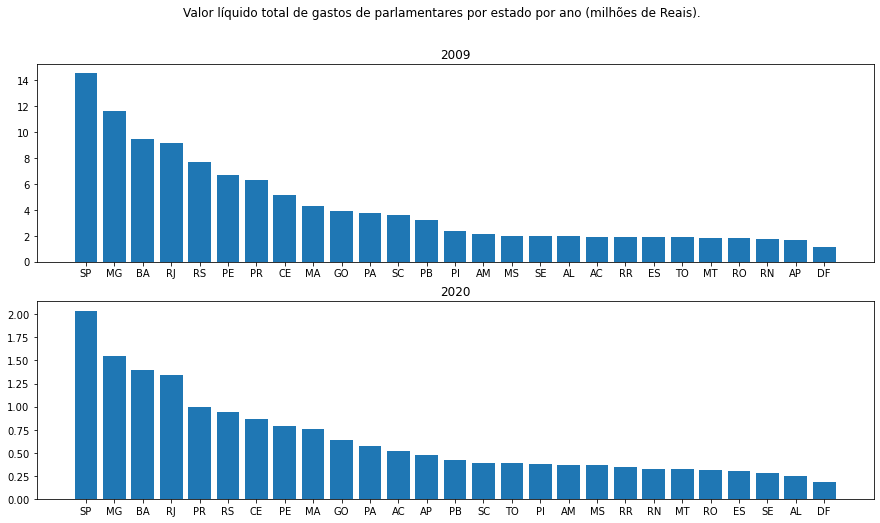

In [21]:
#Plot

#Definição dos eixos a partir dos dataframes df1a1 e a2
x1 = df1a1.iloc[:, 0].astype(str) #Partidos
y1 = df1a1.iloc[:, 1].astype(float)* 1e-6 #Valores com escala de milhões

x2 = df1a2.iloc[:, 0].astype(str) #Partidos
y2 = df1a2.iloc[:, 1].astype(float)* 1e-6#Valores com escala de milhões

#Subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15,8))
axes[0].bar(x1, y1, label = 2009)
axes[1].bar(x2, y2, label = 2020)

#Títulos dos subplots
axes[0].set_title('2009')
axes[1].set_title('2020')

fig.suptitle('Valor líquido total de gastos de parlamentares por estado por ano (milhões de Reais).', horizontalalignment='center')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

### Por partido

In [22]:
#Verificação dos valores distintos de partido no dataset

df['sgpartido'].unique()

array(['PSDB', 'PT', 'LIDMIN', 'NOVO', 'PDT', 'PODE', 'PP', 'PROS', 'PSD',
       'PTB', 'SDD', 'DEM', 'PSB', 'REPUBLICANOS', 'CIDADANIA', 'PSOL',
       'MDB', 'PCdoB', 'PL', 'PSC', 'PSL', 'SOLIDARIEDADE', 'LID.GOV-CD',
       'AVANTE', 'PHS', 'PTN', 'PATRIOTA', 'LID.GOV-CN', 'PV', 'PMDB',
       'ATHOS AVELINO', 'FERNANDO ESTIMA', 'JOÃO FONTES', 'LUIZ MOREIRA',
       'PROFESSOR LUIZINHO', 'PP**', 'PRB', 'SD', 'PPS', 'REDE', 'PR',
       'PEN', 'PATRI', 'PTC', 'PMN', 'PPL', 'PTdoB', 'S.PART.', 'PRTB',
       'PRP', 'PSDC'], dtype=object)

In [23]:
#Lista de partidos 

partidos = ['PSDB', 'PT', 'LIDMIN', 'NOVO', 'PDT', 'PODE', 'PP', 'PROS', 'PSD',
       'PTB', 'SDD', 'DEM', 'PSB', 'REPUBLICANOS', 'CIDADANIA', 'PSOL',
       'MDB', 'PCdoB', 'PL', 'PSC', 'PSL', 'SOLIDARIEDADE',
       'AVANTE', 'PHS', 'PTN', 'PATRIOTA', 'PV', 'PMDB',
        'PP**', 'PRB', 'SD', 'PPS', 'REDE', 'PR', 'PEN', 'PATRI', 'PTC',
        'PMN', 'PPL', 'PTdoB', 'S.PART.', 'PRTB','PRP', 'PSDC']

#Filtragem dos registros que não possuem partido
df1b = df.loc[df['sgpartido'].isin(partidos)]
df1b['sgpartido'].unique()

array(['PSDB', 'PT', 'LIDMIN', 'NOVO', 'PDT', 'PODE', 'PP', 'PROS', 'PSD',
       'PTB', 'SDD', 'DEM', 'PSB', 'REPUBLICANOS', 'CIDADANIA', 'PSOL',
       'MDB', 'PCdoB', 'PL', 'PSC', 'PSL', 'SOLIDARIEDADE', 'AVANTE',
       'PHS', 'PTN', 'PATRIOTA', 'PV', 'PMDB', 'PP**', 'PRB', 'SD', 'PPS',
       'REDE', 'PR', 'PEN', 'PATRI', 'PTC', 'PMN', 'PPL', 'PTdoB',
       'S.PART.', 'PRTB', 'PRP', 'PSDC'], dtype=object)

In [24]:
#2009

df1b1 = df1b.loc[df["numano"] == 2009] \
            .groupby(['sgpartido'])["vlrliquido"] \
            .sum() \
            .reset_index() \
            .sort_values('vlrliquido', ascending=True)


In [25]:
#2020

df1b2 = df1b.loc[df["numano"] == 2020] \
            .groupby(['sgpartido'])["vlrliquido"] \
            .sum() \
            .reset_index() \
            .sort_values('vlrliquido', ascending=True)

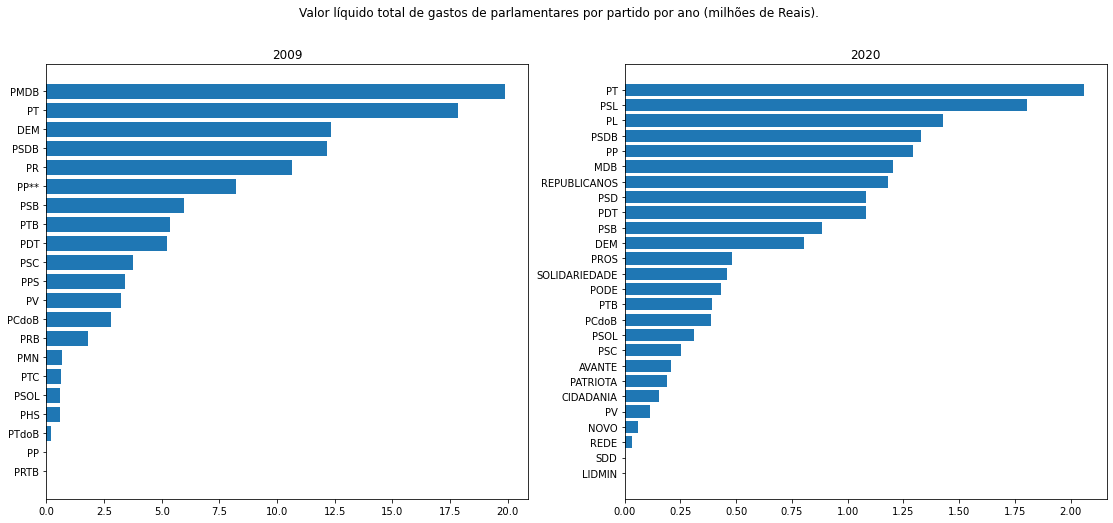

In [26]:
#Plot

#Definição dos eixos a partir dos dataframes df1b1 e b2
x1 = df1b1.iloc[:, 1].astype(float)* 1e-6 #Valores com escala de milhões
y1 = df1b1.iloc[:, 0].astype(str) #Partidos

x2 = df1b2.iloc[:, 1].astype(float)* 1e-6 #Valores com escala de milhões
y2 = df1b2.iloc[:, 0].astype(str) #Partidos

#Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (19,8))
axes[0].barh(y1, x1)
axes[1].barh(y2, x2)

#Títulos dos subplots
axes[0].set_title('2009')
axes[1].set_title('2020')

fig.suptitle('Valor líquido total de gastos de parlamentares por partido por ano (milhões de Reais).', horizontalalignment='center')
plt.show()

## 2 - Carteira parlamentar no SC

In [27]:
#Verificação do deputado com valor máximo da carteira parlamentar

df2 = df.loc[df['nucarteiraparlamentar'] == df['nucarteiraparlamentar'] \
        .loc[df['sguf'] == 'SC'].max()] \
        .filter(items = ['txnomeparlamentar','nucarteiraparlamentar', 'sgpartido', 'sguf']) 
df2.head(1)

,txnomeparlamentar,nucarteiraparlamentar,sgpartido,sguf
3701600,FRANCISCO DE ASSIS,652.0,PT,SC


## 3 - Quantidadade de registros entre 01/01/2019 e 30/06/2020

### SP

In [198]:
registros_sp = len(df[(df["sguf"]=="SP") & \ #SP
                      (df["nummes"]>=1) & (df["nummes"]<= 6) & \ #Entre Janeiro e Junho
                      (df["numano"] >= 2019) & (df["numano"] <= 2020)]) #Entre 2019 e 2020

print(registros_sp, 'registros.')

25044 registros.


### RJ

In [199]:
registros_rj = len(df[(df["sguf"]=="RJ") & \ #RJ
                      (df["nummes"]>=1) & (df["nummes"]<= 6) & \ #Entre Janeiro e Junho
                      (df["numano"] >= 2019) & (df["numano"] <= 2020)]) #Entre 2019 e 2020

print(registros_rj, 'registros.')

15036 registros.


### SC

In [201]:
registros_sc = len(df[(df["sguf"]=="SC") & \ #SC
                      (df["nummes"]>=1) & (df["nummes"]<= 6) & \ #Entre Janeiro e Junho
                      (df["numano"] >= 2019) & (df["numano"] <= 2020)])  #Entre 2019 e 2020

print(registros_sc, 'registros.')

5746 registros.


## 4 - Gastos com serviço de táxi

In [91]:
#Verificação dos valores distintos da coluna 'txtdescricao'.

df['txtdescricao'].unique()

array(['DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.',
       'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR',
       'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR',
       'COMBUSTÍVEIS E LUBRIFICANTES.', 'PASSAGENS AÉREAS', 'TELEFONIA',
       'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES',
       'SERVIÇOS POSTAIS',
       'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.',
       'SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.',
       'Emissão Bilhete Aéreo',
       'HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.',
       'SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO',
       'PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR',
       'LOCAÇÃO OU FRETAMENTO DE AERONAVES',
       'PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS',
       'ASSINATURA DE PUBLICAÇÕES',
       'LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES',
       'LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES',
       'LOCOMOÇÃO, ALIMENTAÇÃO E  HOSPEDAGEM',
       'AQUISIÇÃO DE MATERIAL DE ESCRITÓRIO.

In [296]:
#Filtragem dos registros de serviços de táxi com pelo menos uma ocorrência de restituição

df4 = df.loc[(df["numano"] == 2019) & \
             (df['txtdescricao'] =='SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO') & \
             ((df['vlrrestituicao'] != None).sum() > 0)]\
        .groupby(["sgpartido"])["vlrliquido"].sum()\
        .reset_index()\
        .sort_values('vlrliquido', ascending=True)

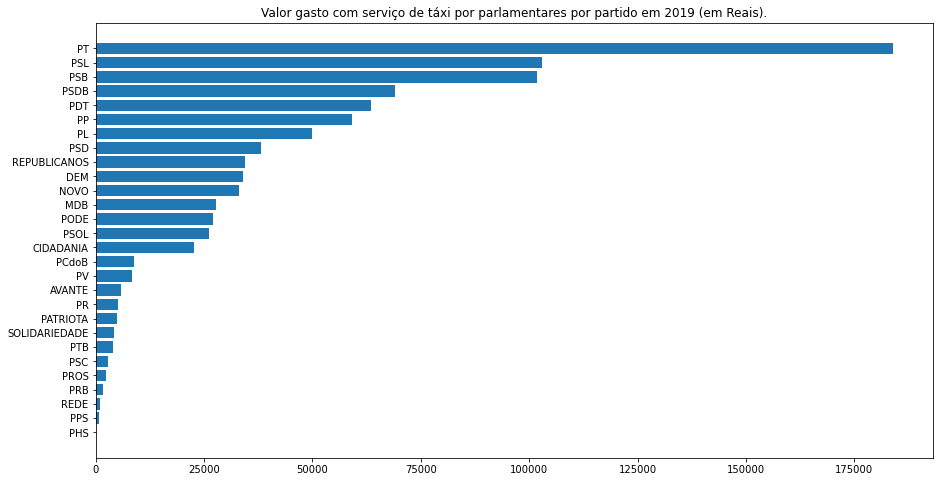

In [297]:
#Plot

#Definição dos eixos a partir do dataframe df4
x = df4.iloc[:, 1].apply(lambda x: round(x, 2)).astype(float) #Limitando a duas casas decimais
y = df4.iloc[:, 0].astype(str) #Partidos

plt.figure(figsize=(15, 8)) #Tamanho do plot
plt.barh(y, x) #Barras horizontais

plt.title('Valor gasto com trechos contendo "FLN" ou "POA" por parlamentares por partido em 2019 (em Reais).')

plt.show()

## 5 - Registros de passagem de avião

In [247]:
#Trechos contendo 'FLN' ou 'POA'

df5 = df.loc[(df["numano"] >= 2019) & (df["numano"] <= 2020) & \ #2019 e 2020
             (df['txttrecho'].str.contains('POA').any() | df['txttrecho'].str.contains('FLN').any())] \ #FLN ou POA
        .groupby(["sgpartido"])["vlrliquido"].sum() \ #Agrupamento de partidos pela soma do valor líquido
        .reset_index() \
        .sort_values('vlrliquido', ascending=True)

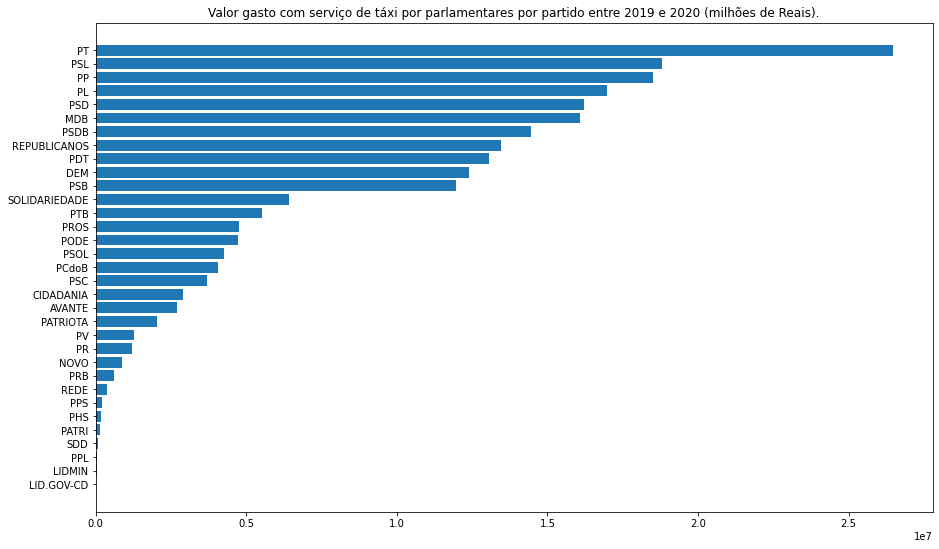

In [253]:
#Plot

#Definição dos eixos a partir do dataframe df5
x = df5.iloc[:, 1].astype(float) #Valores
y = df5.iloc[:, 0].astype(str) #Partidos


plt.figure(figsize=(15, 9)) #Tamanho do plot
plt.barh(y, x) #Barras horizontais

plt.title('Valor gasto com serviço de táxi por parlamentares por partido entre 2019 e 2020 (milhões de Reais).')

plt.show()